# Step 2 - Exploring Data

On the previous module you learned a series of techniques and tools for data acquisition. Once we have acquired our data, our very next step is to explore it to identify trends, correlations, errors and/or discrepancies. By the end of this courselet, you will be able to:

1. Recognize the importance of exploring data
2. Use different visualization methods for data exploration

In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

## Visualizing our data

A powerful technique to get a quick and effective method to look at our data is the use of visualization techniques. There are multiple types of visualizations, and each of them provide different information from our data. Let's explore some of them. 



In [66]:
# fetch dataset - https://archive.ics.uci.edu/dataset/186/wine+quality
wine_quality = fetch_ucirepo(id=186) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

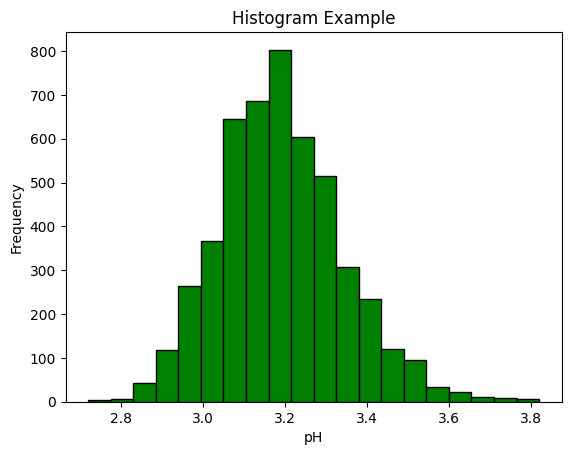

In [67]:
# Histogram
plt.hist(X['pH'], bins=20, color='green', edgecolor='black')

# Add labels and a title
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show the histogram
plt.show()

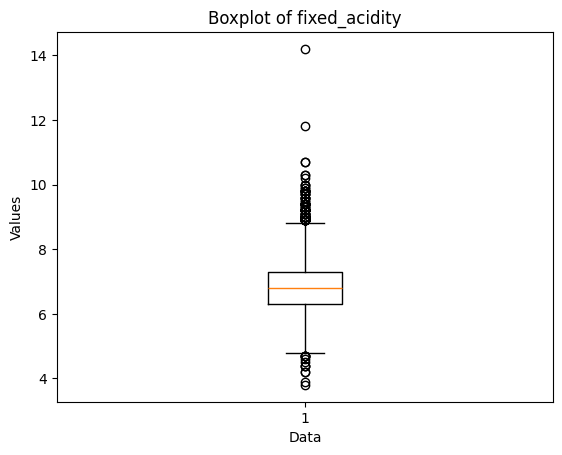

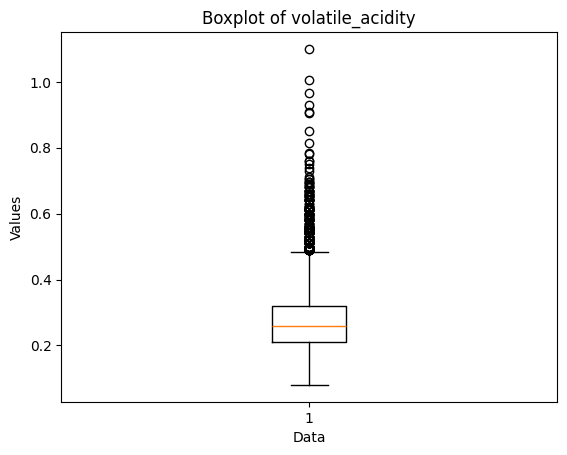

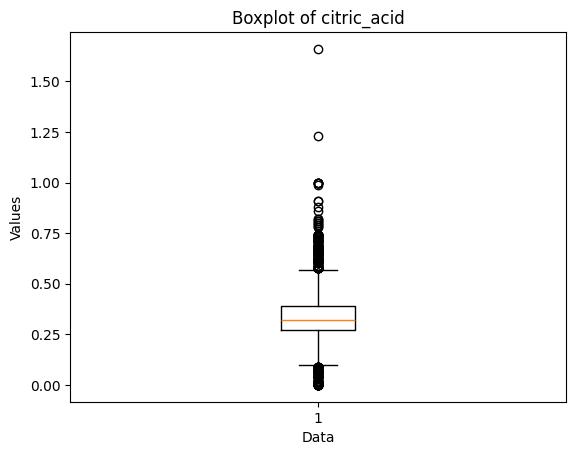

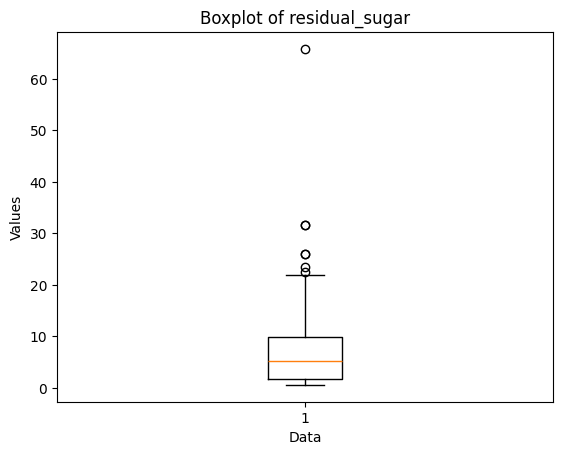

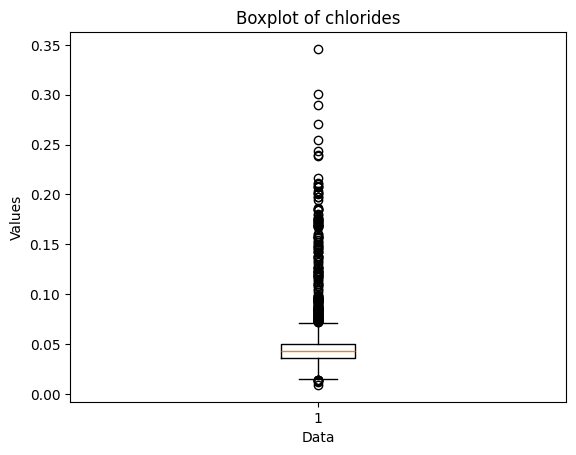

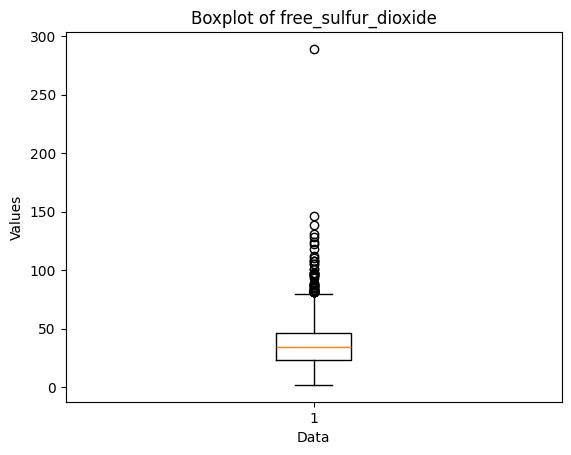

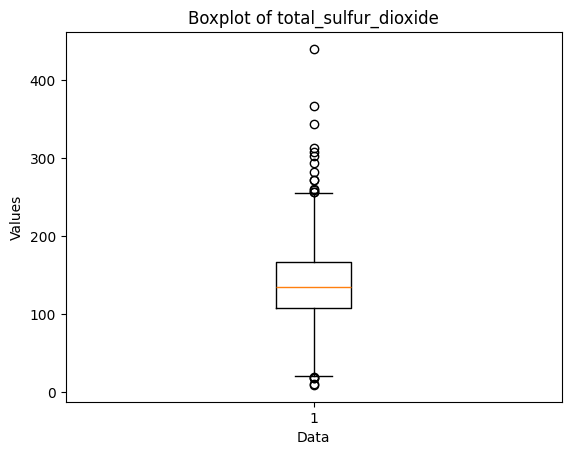

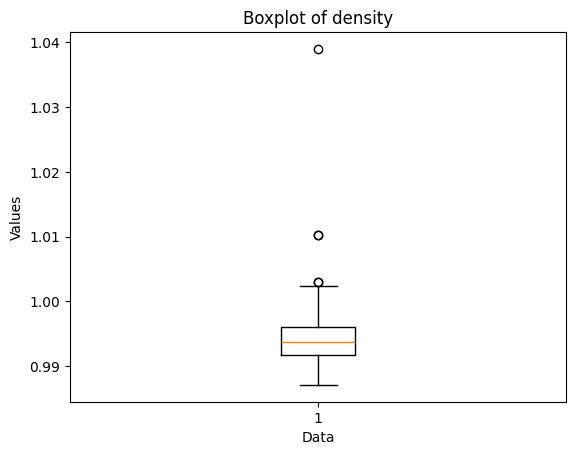

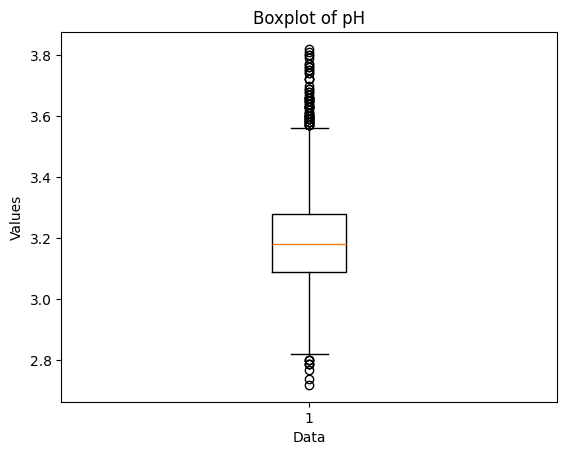

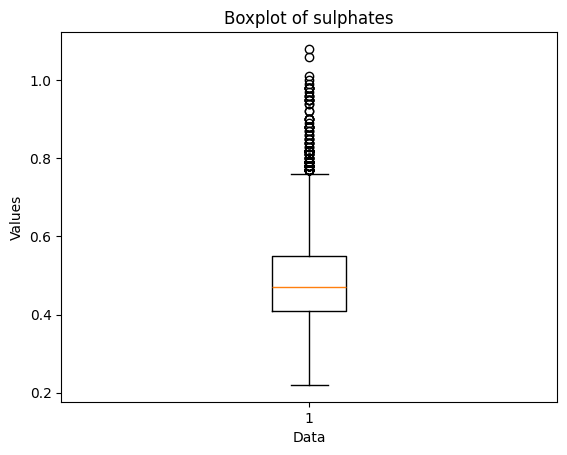

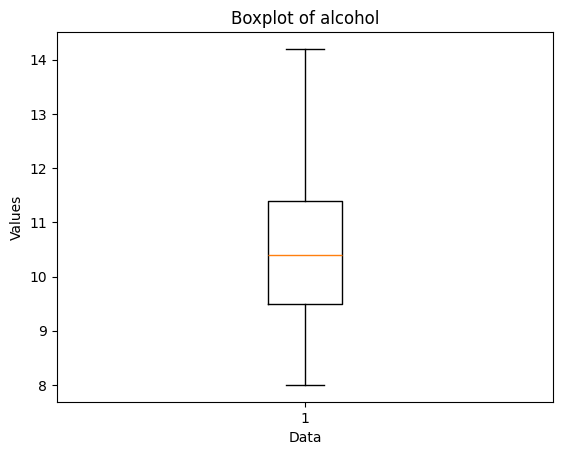

In [68]:
# Boxplot
for column in X.columns:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(X[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Data')
    plt.ylabel('Values')
    plt.show()


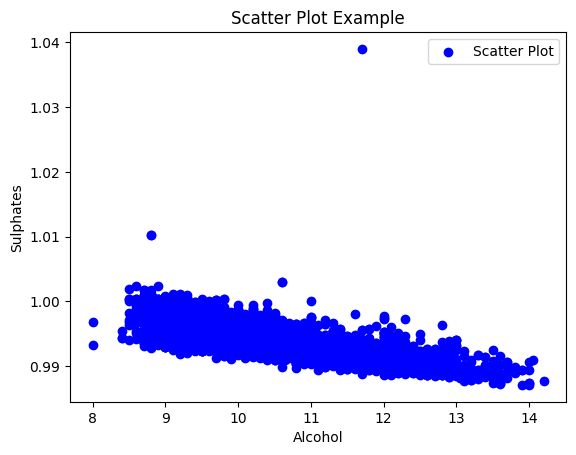

In [69]:
# Scatterplot
plt.scatter(X['alcohol'], X['density'], label='Scatter Plot', color='blue', marker='o')

plt.xlabel('Alcohol')
plt.ylabel('Sulphates')
plt.title('Scatter Plot Example')

# Add a legend
plt.legend()

# Show the scatter plot
plt.show()

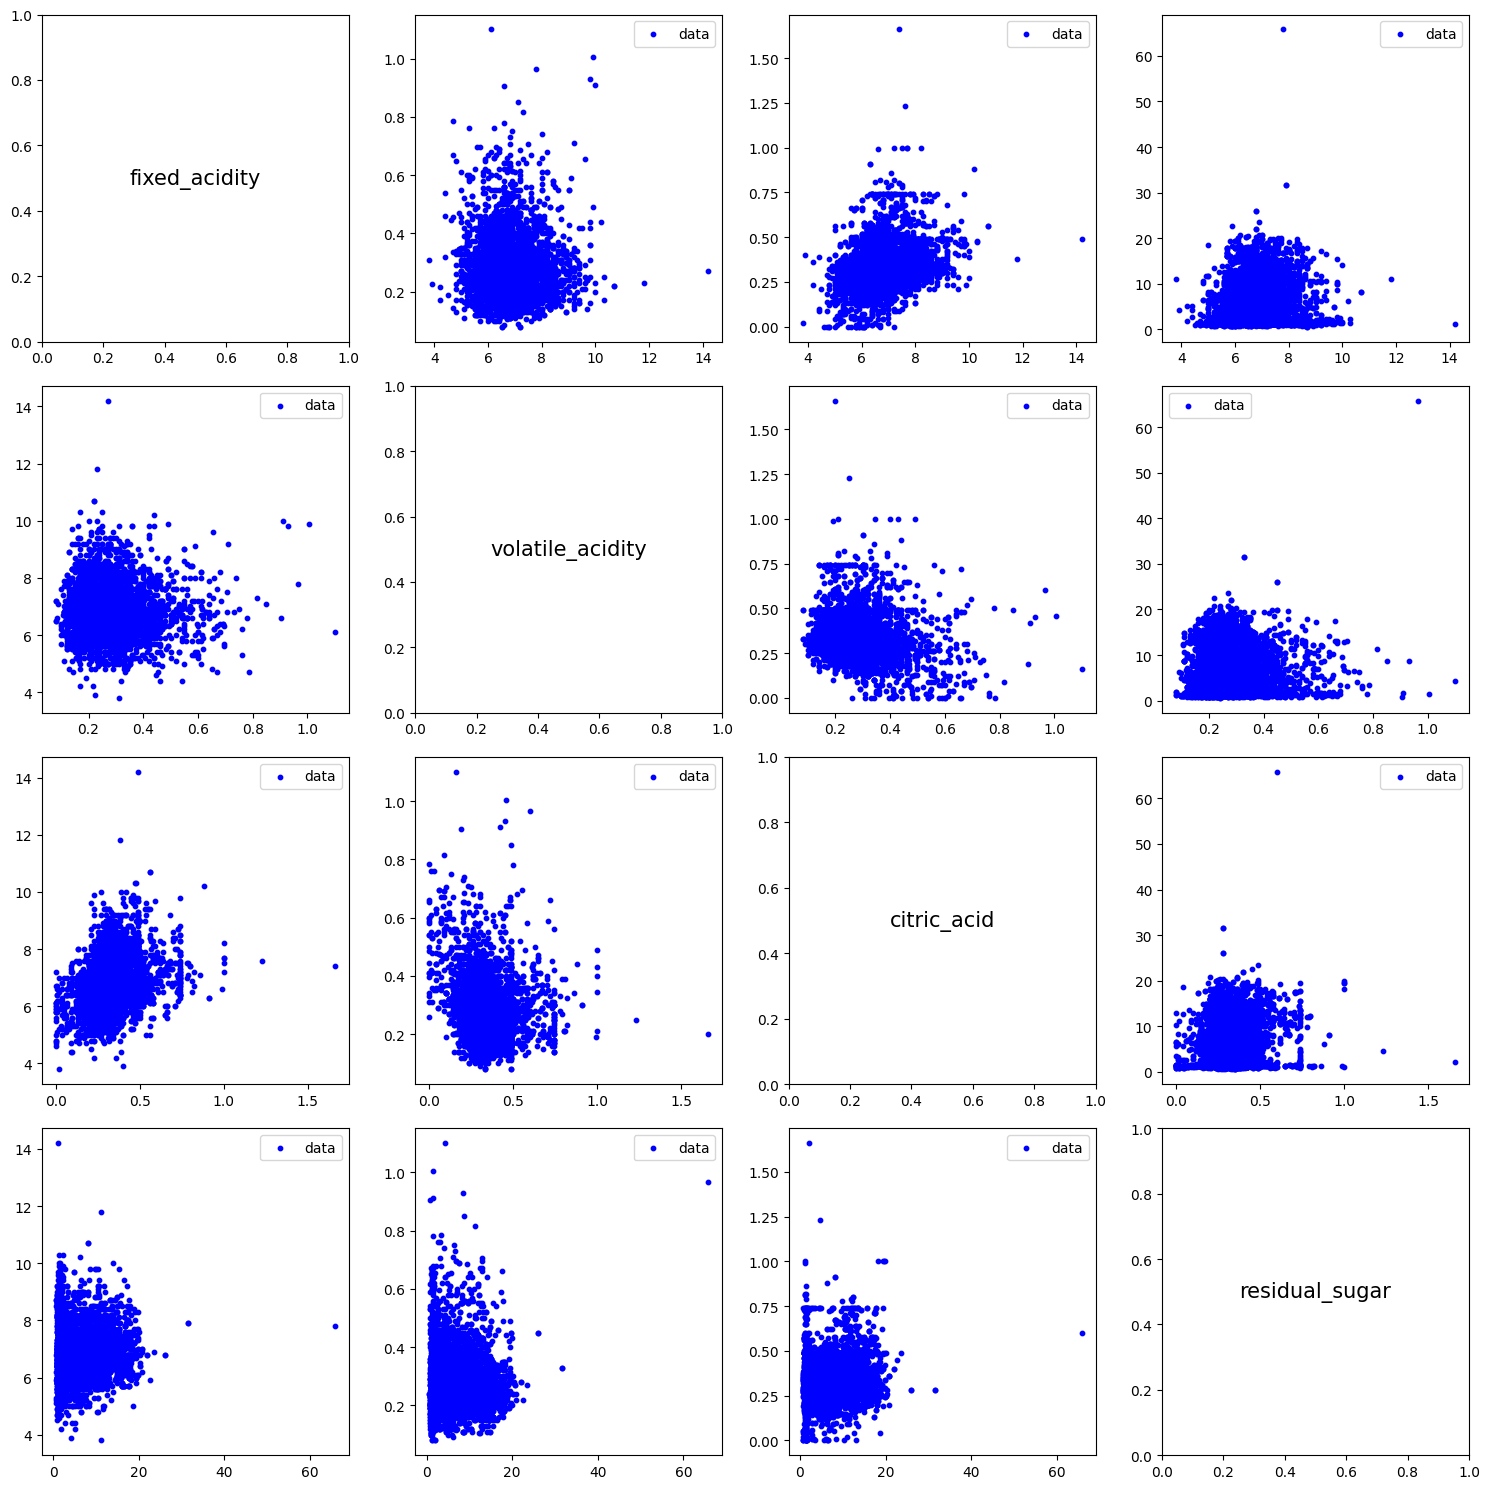

In [75]:
# Scatterplot
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        if i == j:
            ax.text(0.5, 0.5, X.columns[i], ha='center', va='center', fontsize=15) 
        else:
            x = X.columns[i]
            y = X.columns[j]
            ax.scatter(X[x], X[y], label="data",color='blue', marker='o', s=10)
            ax.legend()

# Adjust layout for better visibility
plt.tight_layout()

# Show the grid of scatterplots
plt.show()


In [71]:
# fetch dataset - https://archive.ics.uci.edu/dataset/360/air+quality
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
ts = air_quality.data.features

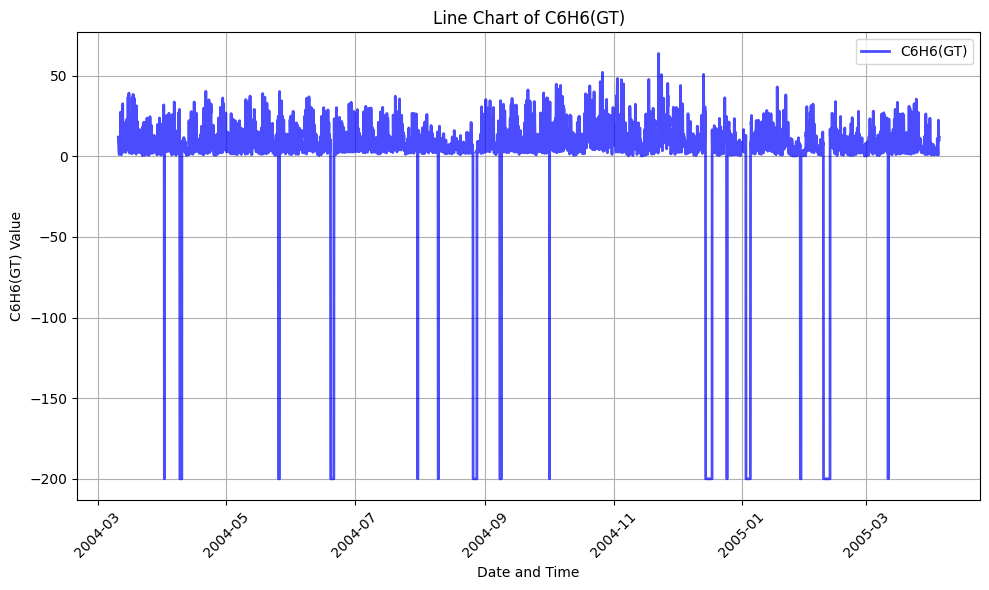

In [72]:
# Line Graphs
ts['Datetime'] = pd.to_datetime(ts['Date'] + ' ' + ts['Time'])

# Extract 'Datetime' and 'C6H6(GT)' column data
datetime = ts['Datetime']
c6h6_gt = ts['C6H6(GT)']

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(datetime, c6h6_gt, color='blue', label='C6H6(GT)', alpha=0.7, lw=2)  
plt.title('Line Chart of C6H6(GT)')
plt.xlabel('Date and Time')
plt.ylabel('C6H6(GT) Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the line chart
plt.tight_layout()
plt.show()

### Descriptive Statistics

Another powerful tool when

The easiest way to accomplish this in Pandas is through the use of the *describe* method. Let's take a look.

In [73]:
# Descriptive statistics
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000
